In [8]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as  web
import matplotlib.pyplot as pp
from datetime import datetime, timedelta, date

In [10]:
start = datetime(1970,1,2)
end = datetime(2021,12,31)

In [11]:
start 

datetime.datetime(1970, 1, 2, 0, 0)

In [12]:
df_SPY = web.DataReader('SPY','yahoo',start,end)

In [13]:
df_SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.968750,43.750000,43.968750,43.937500,1003200.0,25.547968
1993-02-01,44.250000,43.968750,43.968750,44.250000,480500.0,25.729692
1993-02-02,44.375000,44.125000,44.218750,44.343750,201300.0,25.784195
1993-02-03,44.843750,44.375000,44.406250,44.812500,529400.0,26.056759
1993-02-04,45.093750,44.468750,44.968750,45.000000,531500.0,26.165785
...,...,...,...,...,...,...
2021-12-27,477.309998,472.010010,472.059998,477.260010,56808600.0,475.781921
2021-12-28,478.809998,476.059998,477.720001,476.869995,47274600.0,475.393127
2021-12-29,478.559998,475.920013,476.980011,477.480011,54503000.0,476.001251


In [14]:
returns = df_SPY['Adj Close'].pct_change(1).dropna().to_numpy()

In [15]:
forward_days = 5 * 253
start_price = float(df_SPY['Adj Close'].tail(1))

In [16]:
simulated = np.random.choice(returns,size=forward_days,replace=True)
simulated_equity = start_price*(1+simulated).cumprod()
rolling_max = np.maximum.accumulate(simulated_equity)
max_dd = np.max((rolling_max - simulated_equity)/rolling_max)

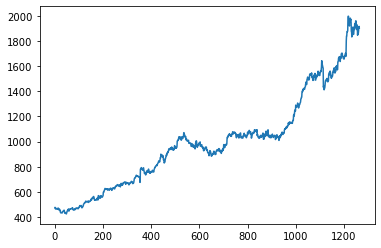

In [17]:
pp.plot(simulated_equity)

In [18]:
dd = np.array([])
for n in range(2000):
  simulated = np.random.choice(returns, size=forward_days,  replace=True)
  simulated_equity = start_price*(1+simulated).cumprod()
  rolling_max = np.maximum.accumulate(simulated_equity)
  max_dd = np.max((rolling_max - simulated_equity)/rolling_max)
  dd = np.append(dd,max_dd)

(array([ 82., 404., 545., 440., 273., 149.,  68.,  27.,   8.,   4.]),
 array([0.10879953, 0.16605157, 0.22330361, 0.28055565, 0.33780768,
        0.39505972, 0.45231176, 0.5095638 , 0.56681583, 0.62406787,
        0.68131991]),
 <BarContainer object of 10 artists>)

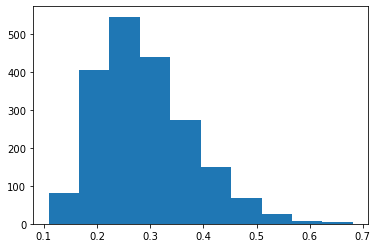

In [19]:
pp.hist(dd)

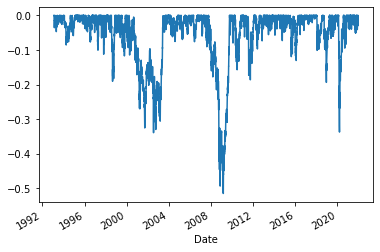

In [20]:
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = df_SPY['Adj Close'].rolling(window, min_periods=1).max()
Daily_Drawdown = df_SPY['Adj Close']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
Daily_Drawdown.plot()
pp.show()

In [21]:
start = datetime(1970,1,2)
end = datetime(2021,12,31)

df_SPY = pdr.DataReader('SPY','yahoo',start,end) #미국 주식
df_TLT = pdr.DataReader('TLT','yahoo',start,end) #미국 채권
df_GLD = pdr.DataReader('GLD','yahoo',start,end) #금
df_BIL = pdr.DataReader('BIL','yahoo',start,end) #미국 초단기 채권

In [22]:
#LOG 수익률 계산
SPY_PROFIT = df_SPY['Close'].pct_change()*100
SPY_PROFIT.iloc[0] = 0

TLT_PROFIT = df_TLT['Close'].pct_change()*100
TLT_PROFIT.iloc[0] = 0

GLD_PROFIT = df_GLD['Close'].pct_change()*100
GLD_PROFIT.iloc[0] = 0

BIL_PROFIT = df_BIL['Close'].pct_change()*100
BIL_PROFIT.iloc[0] = 0

In [30]:
SPY_LOG_PROFIT = np.log(SPY_PROFIT +1)
TLT_LOG_PROFIT = np.log(TLT_PROFIT +1)
GLD_LOG_PROFIT = np.log(GLD_PROFIT +1)
BIL_LOG_PROFIT = np.log(BIL_PROFIT +1)

C:\Users\sjo20\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
#LOG 누적 수익률
SPY_LOG_PROFIT_ACC = SPY_LOG_PROFIT.cumsum()
TLT_LOG_PROFIT_ACC = TLT_LOG_PROFIT.cumsum()
GLD_LOG_PROFIT_ACC = GLD_LOG_PROFIT.cumsum()
BIL_LOG_PROFIT_ACC = BIL_LOG_PROFIT.cumsum()

In [32]:
pf = (SPY_LOG_PROFIT_ACC * 0.25) + (TLT_LOG_PROFIT_ACC * 0.25) +(GLD_LOG_PROFIT_ACC * 0.25) +(BIL_LOG_PROFIT_ACC * 0.25)

pf = pf.dropna()
pf

Date
2007-05-30   -18.851953
2007-05-31   -18.725968
2007-06-01   -19.018858
2007-06-04   -18.881318
2007-06-05   -19.328306
                ...    
2021-12-23    20.065164
2021-12-27    20.395708
2021-12-28    20.104504
2021-12-30    20.336399
2021-12-31    20.438736
Name: Close, Length: 2531, dtype: float64

In [33]:
pf_data = (df_SPY['Close']*0.25) + (df_TLT['Close']*0.25) + (df_GLD['Close']*0.25) + (df_BIL['Close']*0.25)

pf_data = pf_data.dropna()
pf_data

Date
2007-05-30     99.084999
2007-05-31     99.210001
2007-06-01     99.432501
2007-06-04     99.565002
2007-06-05     99.235003
                 ...    
2021-12-27    221.735003
2021-12-28    221.304996
2021-12-29    221.040001
2021-12-30    221.322500
2021-12-31    221.385000
Name: Close, Length: 3676, dtype: float64

In [34]:
window = 20
max_window = pf_data.rolling(window, min_periods=1).max()
dd=((pf_data/max_window)-1)*100
mdd = dd.rolling(window,min_periods=1 ).min()

print(mdd)

Date
2007-05-30    0.000000
2007-05-31    0.000000
2007-06-01    0.000000
2007-06-04    0.000000
2007-06-05   -0.331442
                ...   
2021-12-27   -2.435596
2021-12-28   -2.435596
2021-12-29   -2.435596
2021-12-30   -1.824427
2021-12-31   -1.824427
Name: Close, Length: 3676, dtype: float64


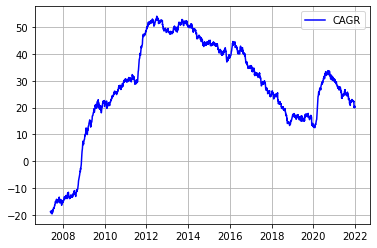

In [35]:
plt.plot(pf.index, pf,'b',label='CAGR')

plt.grid(True)
plt.legend(loc='best')
plt.show()

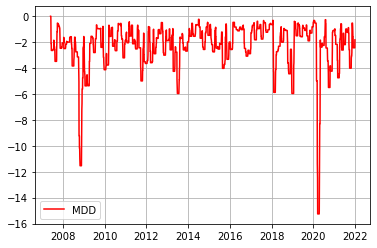

In [36]:
plt.plot(mdd.index, mdd, 'r', label='MDD')

plt.grid(True)
plt.legend(loc='best')
plt.show()